In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

df = pd.read_table('MeTeORFlatFiles/MeTeORgenegene.txt')
df.rename(columns={df.columns[0]: 0, df.columns[1]: 1}, inplace=True)

In [3]:
G = nx.from_pandas_edgelist(df, 0, 1, 'Confidence')

In [18]:
neighbors = dict()

In [20]:
import heapq
import math 

top_hypotheses = []
flag = False

for i, (a, b) in enumerate(nx.non_edges(G)):
    if i%100000 == 0:
        print(f'Done with {i} hypotheses...')

    mutual = sum(1 for _ in nx.common_neighbors(G, a, b))
    
    if a not in neighbors:
        neighbors[a] = set(G.neighbors(a))
    
    if b not in neighbors:
        neighbors[b] = set(G.neighbors(b))

    mutual /= len(neighbors[a].union(neighbors[b]))
    
    if not top_hypotheses or len(top_hypotheses) < 1000:
        heapq.heappush(top_hypotheses, (mutual, (a, b)))
    
    elif top_hypotheses[0][0] < mutual:
        heapq.heappushpop(top_hypotheses, (mutual, (a, b)))

Done with 0 hypotheses...
Done with 100000 hypotheses...
Done with 200000 hypotheses...
Done with 300000 hypotheses...
Done with 400000 hypotheses...
Done with 500000 hypotheses...
Done with 600000 hypotheses...
Done with 700000 hypotheses...
Done with 800000 hypotheses...
Done with 900000 hypotheses...
Done with 1000000 hypotheses...
Done with 1100000 hypotheses...
Done with 1200000 hypotheses...
Done with 1300000 hypotheses...
Done with 1400000 hypotheses...
Done with 1500000 hypotheses...
Done with 1600000 hypotheses...
Done with 1700000 hypotheses...
Done with 1800000 hypotheses...
Done with 1900000 hypotheses...
Done with 2000000 hypotheses...
Done with 2100000 hypotheses...
Done with 2200000 hypotheses...
Done with 2300000 hypotheses...
Done with 2400000 hypotheses...
Done with 2500000 hypotheses...
Done with 2600000 hypotheses...
Done with 2700000 hypotheses...
Done with 2800000 hypotheses...
Done with 2900000 hypotheses...
Done with 3000000 hypotheses...
Done with 3100000 hypot

Done with 25200000 hypotheses...
Done with 25300000 hypotheses...
Done with 25400000 hypotheses...
Done with 25500000 hypotheses...
Done with 25600000 hypotheses...
Done with 25700000 hypotheses...
Done with 25800000 hypotheses...
Done with 25900000 hypotheses...
Done with 26000000 hypotheses...
Done with 26100000 hypotheses...
Done with 26200000 hypotheses...
Done with 26300000 hypotheses...
Done with 26400000 hypotheses...
Done with 26500000 hypotheses...
Done with 26600000 hypotheses...
Done with 26700000 hypotheses...
Done with 26800000 hypotheses...
Done with 26900000 hypotheses...
Done with 27000000 hypotheses...
Done with 27100000 hypotheses...
Done with 27200000 hypotheses...
Done with 27300000 hypotheses...
Done with 27400000 hypotheses...
Done with 27500000 hypotheses...
Done with 27600000 hypotheses...
Done with 27700000 hypotheses...
Done with 27800000 hypotheses...
Done with 27900000 hypotheses...
Done with 28000000 hypotheses...
Done with 28100000 hypotheses...
Done with 

Done with 50100000 hypotheses...
Done with 50200000 hypotheses...
Done with 50300000 hypotheses...
Done with 50400000 hypotheses...
Done with 50500000 hypotheses...
Done with 50600000 hypotheses...
Done with 50700000 hypotheses...
Done with 50800000 hypotheses...
Done with 50900000 hypotheses...
Done with 51000000 hypotheses...
Done with 51100000 hypotheses...
Done with 51200000 hypotheses...
Done with 51300000 hypotheses...
Done with 51400000 hypotheses...
Done with 51500000 hypotheses...
Done with 51600000 hypotheses...
Done with 51700000 hypotheses...
Done with 51800000 hypotheses...
Done with 51900000 hypotheses...
Done with 52000000 hypotheses...
Done with 52100000 hypotheses...
Done with 52200000 hypotheses...
Done with 52300000 hypotheses...
Done with 52400000 hypotheses...
Done with 52500000 hypotheses...
Done with 52600000 hypotheses...
Done with 52700000 hypotheses...
Done with 52800000 hypotheses...
Done with 52900000 hypotheses...
Done with 53000000 hypotheses...
Done with 

In [28]:
top_hypotheses.sort(key=lambda x: -x[0])

In [29]:
top_hypotheses

[(1.0, (5877, 79874)),
 (1.0, (23287, 222229)),
 (1.0, (55556, 390502)),
 (1.0, (203328, 203427)),
 (1.0, (318, 220441)),
 (1.0, (741, 140623)),
 (1.0, (8209, 387597)),
 (1.0, (219972, 130507)),
 (1.0, (134288, 285315)),
 (1.0, (10493, 55200)),
 (1.0, (84366, 57862)),
 (1.0, (5288, 732253)),
 (1.0, (134510, 55854)),
 (1.0, (56912, 25884)),
 (1.0, (7675, 84928)),
 (1.0, (79796, 152586)),
 (1.0, (6761, 11018)),
 (1.0, (140883, 23223)),
 (1.0, (81889, 54850)),
 (1.0, (6430, 7625)),
 (1.0, (7932, 54768)),
 (1.0, (10290, 83543)),
 (1.0, (122618, 92181)),
 (1.0, (54873, 284406)),
 (1.0, (145864, 30811)),
 (1.0, (81573, 25972)),
 (1.0, (79799, 57862)),
 (1.0, (205860, 23223)),
 (1.0, (140883, 54873)),
 (1.0, (51193, 23204)),
 (1.0, (205860, 54873)),
 (1.0, (7932, 55127)),
 (1.0, (203328, 30811)),
 (1.0, (203427, 30811)),
 (1.0, (7542, 401124)),
 (1.0, (140883, 284406)),
 (1.0, (57221, 30811)),
 (1.0, (10865, 64838)),
 (1.0, (54873, 23223)),
 (1.0, (54768, 55127)),
 (1.0, (145864, 57221)),
 (1

In [30]:
results = [(b,c) for (a, (b,c)) in top_hypotheses]
results

[(5877, 79874),
 (23287, 222229),
 (55556, 390502),
 (203328, 203427),
 (318, 220441),
 (741, 140623),
 (8209, 387597),
 (219972, 130507),
 (134288, 285315),
 (10493, 55200),
 (84366, 57862),
 (5288, 732253),
 (134510, 55854),
 (56912, 25884),
 (7675, 84928),
 (79796, 152586),
 (6761, 11018),
 (140883, 23223),
 (81889, 54850),
 (6430, 7625),
 (7932, 54768),
 (10290, 83543),
 (122618, 92181),
 (54873, 284406),
 (145864, 30811),
 (81573, 25972),
 (79799, 57862),
 (205860, 23223),
 (140883, 54873),
 (51193, 23204),
 (205860, 54873),
 (7932, 55127),
 (203328, 30811),
 (203427, 30811),
 (7542, 401124),
 (140883, 284406),
 (57221, 30811),
 (10865, 64838),
 (54873, 23223),
 (54768, 55127),
 (145864, 57221),
 (85464, 54961),
 (7108, 29118),
 (152006, 27335),
 (171392, 92181),
 (203328, 57221),
 (54020, 25972),
 (57513, 57524),
 (9522, 85438),
 (51170, 220929),
 (54768, 219681),
 (10290, 338773),
 (338773, 83543),
 (342909, 163087),
 (55716, 29991),
 (171392, 122618),
 (167691, 26005),
 (284406

In [31]:
import csv
with open('jaccard.csv','w') as out:
    csv_out=csv.writer(out)
    for row in results:
        csv_out.writerow(row)

Text(0.5, 1.0, 'Confidence Estimates Using Jaccard Measure')

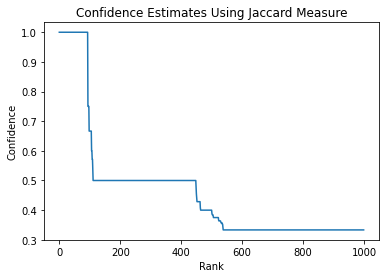

In [33]:
confidence = [a for (a, _) in top_hypotheses]
plt.plot(confidence)
plt.xlabel('Rank')
plt.ylabel('Confidence')
plt.title('Confidence Estimates Using Jaccard Measure')

In [ ]:
# Approach: take the weighted count of paths of length <= 5 between two nodes as the confidence measure.
# I didn't go with this approach because it was too slow, but I've included the code for reference. 

import heapq
import math 

top_hypotheses = []
flag = False
alpha = 0.5

for i, (a, b) in enumerate(nx.non_edges(G)):
    mutual = sum(len(path)*(alpha ** (len(path)-1)) for path in nx.all_simple_paths(G, source=a, target=b, cutoff=5))
    
    if not top_hypotheses or len(top_hypotheses) < 1000:
        heapq.heappush(top_hypotheses, (mutual, (a, b)))
    
    elif top_hypotheses[0][0] < mutual:
        heapq.heappushpop(top_hypotheses, (mutual, (a, b)))
